In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2, :2]
y = y[y<2]

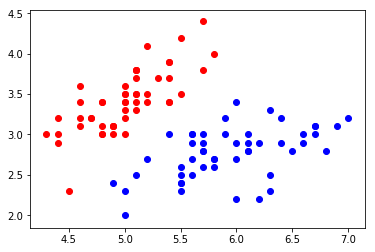

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from myML.LogisticRegression import LogisticRegression

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
log_reg.score(X_test, y_test)

1.0

In [8]:
log_reg.coef_

array([ 3.01749692, -5.03046934])

In [9]:
log_reg.intercept_

-0.68273836989931069

In [10]:
# 定义求X2的函数
def X2(X1):
    return (-log_reg.intercept_ - log_reg.coef_[0] * X1) / log_reg.coef_[1]

In [11]:
# 构建X1
X1 = np.linspace(4, 8, 1000)
X2 = X2(X1)

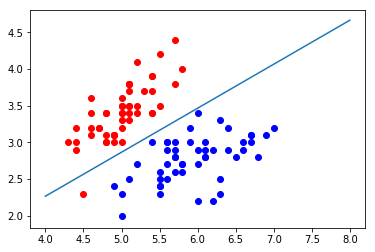

In [12]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.plot(X1, X2)
plt.show()

## 不规则决策边界

In [33]:
def plot_decision_boundary(model, axis):
    # meshgrid函数用两个坐标轴上的点在平面上画格，返回坐标矩阵
    X0, X1 = np.meshgrid(
        # 随机两组数，起始值和密度由坐标轴的起始值决定
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    # ravel()方法将高维数组降为一维数组，c_[]将两个数组以列的形式拼接起来，形成矩阵
    X_grid_matrix = np.c_[X0.ravel(), X1.ravel()]
    
    # 通过训练好的逻辑回归模型，预测平面上这些点的分类
    y_predict = model.predict(X_grid_matrix)
    y_predict_matrix = y_predict.reshape(X0.shape)
    
    # 设置色彩表
    from matplotlib.colors import ListedColormap
    my_colormap = ListedColormap(['#0000CD', '#40E0D0', '#FFFF00'])
    
    # 绘制等高线，并且填充等高区域的颜色
    plt.contourf(X0, X1, y_predict_matrix, linewidth=5, cmap=my_colormap)

In [22]:
x0, x1 = np.meshgrid(
        np.linspace(0, 3, 3).reshape(-1, 1),
        np.linspace(0, 3, 3).reshape(-1, 1),
    )

In [23]:
x0

array([[ 0. ,  1.5,  3. ],
       [ 0. ,  1.5,  3. ],
       [ 0. ,  1.5,  3. ]])

In [24]:
x1

array([[ 0. ,  0. ,  0. ],
       [ 1.5,  1.5,  1.5],
       [ 3. ,  3. ,  3. ]])

In [25]:
x0.ravel()

array([ 0. ,  1.5,  3. ,  0. ,  1.5,  3. ,  0. ,  1.5,  3. ])

In [26]:
x1.ravel()

array([ 0. ,  0. ,  0. ,  1.5,  1.5,  1.5,  3. ,  3. ,  3. ])

In [27]:
np.c_[x0.ravel(), x1.ravel()]

array([[ 0. ,  0. ],
       [ 1.5,  0. ],
       [ 3. ,  0. ],
       [ 0. ,  1.5],
       [ 1.5,  1.5],
       [ 3. ,  1.5],
       [ 0. ,  3. ],
       [ 1.5,  3. ],
       [ 3. ,  3. ]])

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


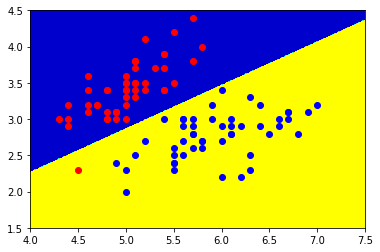

In [34]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

## kNN的决策边界

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


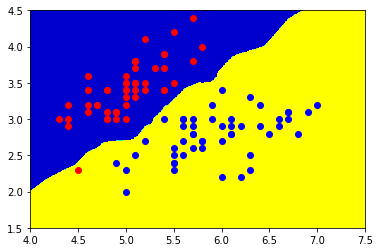

In [37]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

In [40]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


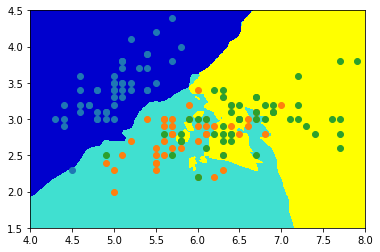

In [42]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


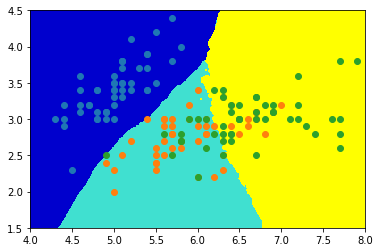

In [43]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()